In [1]:
import pandas as pd
import matplotlib
import scipy.stats
import numpy as np
import re


In [2]:
cases_train = pd.read_csv('../data/cases_train.csv')
cases_train = cases_train
# cases_test = pd.read_csv('../data/cases_test.csv')


In [3]:
# print(cases_train)

<h1> Exploratory data analysis: Cases_train </h1>

<h1>Age</h1>

In [4]:
age = cases_train.age

nan_count = age.isna().sum()

age = pd.DataFrame(age)

for index, r in age.iterrows():
    row = r[0]

    if r.isnull().values.any():
        pass
    elif re.match('\d+ *- *\d+', row): #re.match('[0-9][0-9]-[0-9][0-9]', row) or re.match('[0-9]-[0-9][0-9]', row) or re.match('[0-9]-[0-9]', row) or re.match('[0-9][0-9] - [0-9][0-9]', row): # '54-56'
        val = str(row).split('-')
        avg = (int(val[0])+int(val[1]))/2
        age.loc[index] = int(avg)
    elif re.match('\d+ *months*', row): #re.match('[0-9] month', row): # '8 month'
        val = str(row).split('month')
        val = float(val[0].strip())
        age.loc[index] = int(val/12)
    elif re.match('[0-9][0-9][-|+]$', row): # '80+', '80-'
        age.loc[index] = int(row[0]+row[1])
    else: # converts floats to ints for all other cases
        age.loc[index] = int(float(row))

new_age_col_unimputed = age.copy()

age = age.dropna()

#age.age.unique()
age

,age
3,24
7,47
10,24
16,60
18,73
...,...
367626,31
367627,69
367631,15
367634,28


In [5]:
# type(age)
print("Mean age: ", age.age.mean())
print("Median age: ", age.age.median())
print("Modal age: ", age.age.mode()[0])
print("NaN count age: ", nan_count)

Mean age:  43.678350203004335
Median age:  44.0
Modal age:  47
NaN count age:  209265


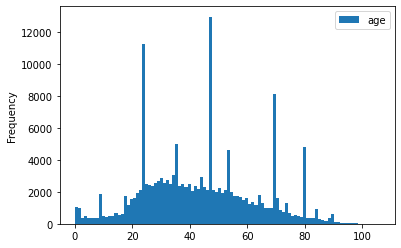

In [6]:
hist = age.plot.hist( bins=100)

<h1> Latitude & Longitude </h1>

        latitude  longitude
26410        NaN        NaN
230376       NaN        NaN
2


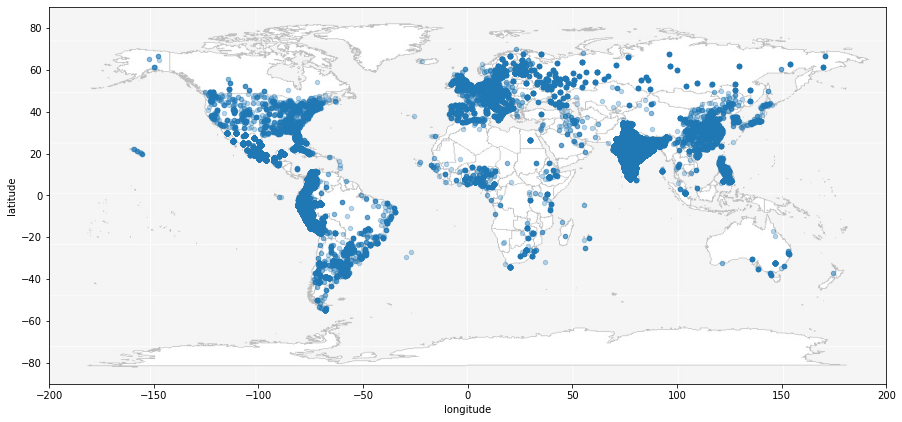

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

latlong = cases_train[["latitude", "longitude"]]
empty = latlong[latlong.isnull().any(axis =1)]
print (empty)
print (empty.shape[0])
# print (latlong)

# im = plt.imread("wrldmap.png")
# # dim = imresize(size = (360,180))
# plt.imshow(im,zorder=1)
# plt.scatter( x=latlong.longitude, y=latlong.latitude, alpha=0.4, zorder=2)

world_map = mpimg.imread('wrldmap.jpg')
latlong.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3, figsize=(15, 12))
plt.imshow(world_map, extent=[-200, 200, -90, 90], alpha=0.5)
plt.show()


<h1> Sex </h1>

NaN count sex:  207084


<AxesSubplot:>

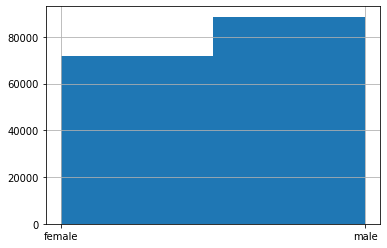

In [8]:
sex = cases_train.sex

nan_count = sex.isna().sum()
print ("NaN count sex: ", nan_count)
sex = sex.dropna()
unique = sex.unique().shape[0]
sex.hist(bins = unique)

<h1> Outcome </h1>

NaN count outcome:  0


<AxesSubplot:>

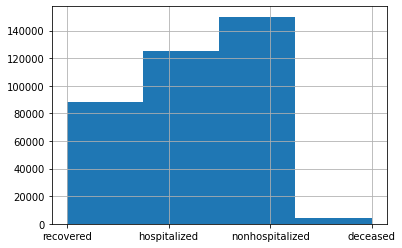

In [9]:
outcome = cases_train.outcome
nan_count = outcome.isna().sum()
print ("NaN count outcome: ", nan_count)
outcome = outcome.dropna()
unique = outcome.unique().shape[0]
outcome.hist(bins = unique)

<h1> Country </h1>

NaN count country:  18


<AxesSubplot:>

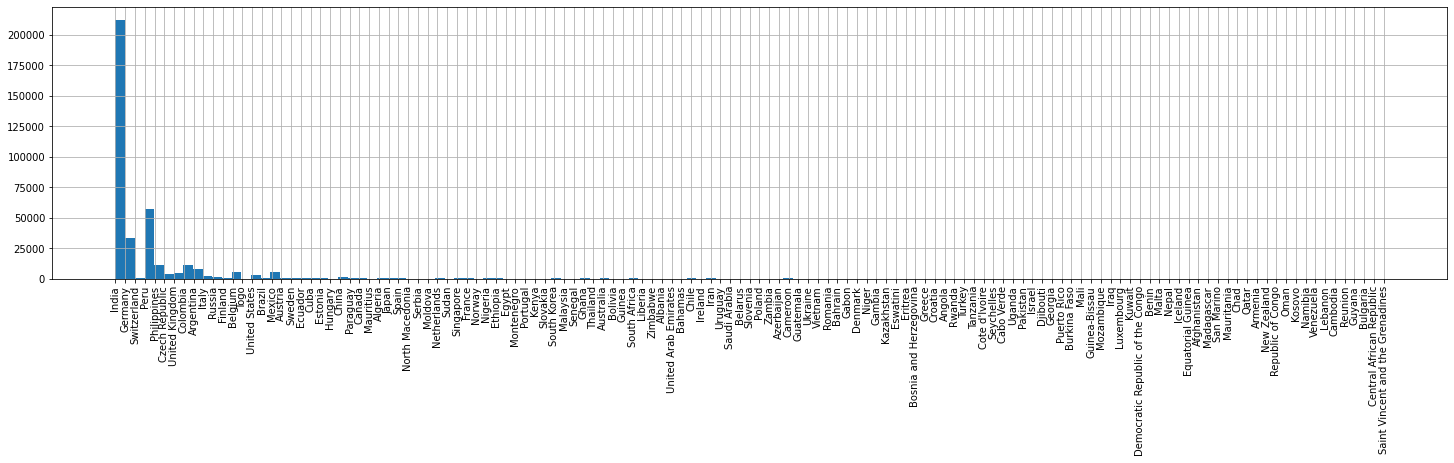

In [10]:
country = cases_train.country
nan_count = country.isna().sum()
print ("NaN count country: ", nan_count)
country = country.dropna()
unique = country.unique().shape[0]
# print (unique)
country.hist(bins = unique, xrot= 90, figsize= (25,5))

<h1> Province </h1>

NaN count province:  4106
55


<AxesSubplot:>

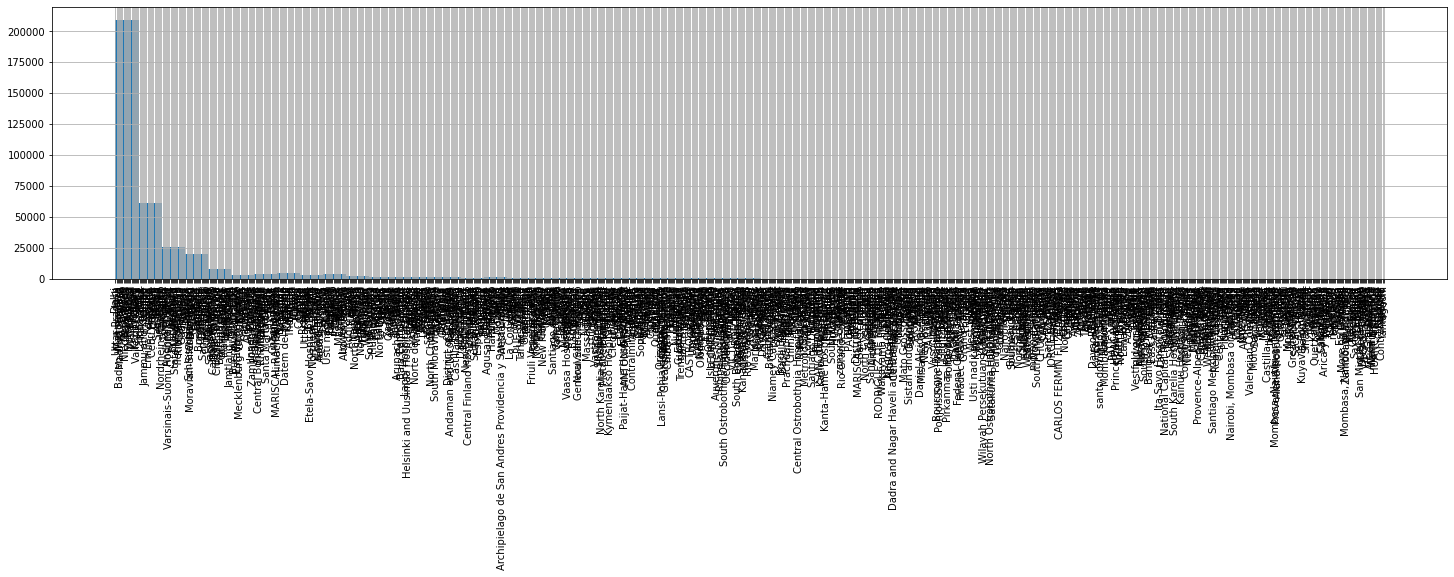

In [13]:
province = cases_train.province
nan_count = province.isna().sum()
print ("NaN count province: ", nan_count)
province = province.dropna()
unique = int(province.unique().shape[0] / 20)
print (unique)
province.hist(bins = unique, xrot= 90, figsize= (25,5))

<h1> Date Confirmation </h1>

NaN count date_confirmation:  288


<AxesSubplot:>

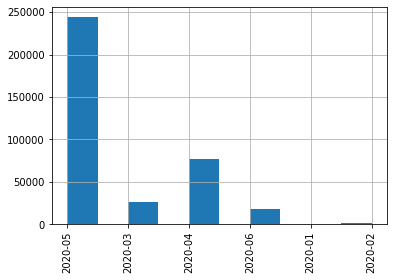

In [12]:
date_confirm = cases_train.date_confirmation
nan_count = date_confirm.isna().sum()
print ("NaN count date_confirmation: ", nan_count)
date_confirm = date_confirm.dropna()

index = date_confirm[date_confirm.str.contains("-")].index

for i in index:
    date = date_confirm[i]
    date = date.split('-')[0].strip()
    date_confirm[i] = date

date_confirm = pd.to_datetime(date_confirm, infer_datetime_format=True)

month_year = date_confirm.dt.to_period('M')
unique = month_year.unique().shape[0]
month_year.unique()

month_year = month_year.dt.strftime('%Y-%m')
month_year.hist(xrot= 90)


<h1> Exploratory data analysis: Location </h1>

In [15]:
location = pd.read_csv('../data/location.csv')
location

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416
